# Рад са векторима и матрицама - NumPy

<div>
   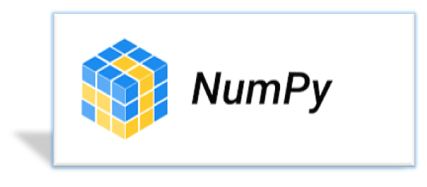  
</div>

Садржај:
1. [Векторски простори](#Векторски-простори)
1. [Операције над векторима и матрицама](#Operacije-nad-vektorima-i-matricama-u-NumPy-biblioteci)
    1. [Скалирање `*`](#Skaliranje-vektora-i-matrica)
        1. [Напомена о листама и операцији`*`](#Napomena-o-listama-i-`+`)
    1. [Сабирање `+`](#Sabiranje-vektora-i-matrica)
        1. [Напомена о листама и операцији `+`](#Напомена-о-листама-и-операцији-+)
    1. [Транспоновање`transpose` или `T`](#Transponovanje-vektora-i-matrica)
    1. [Скаларни производ и множење матрица `dot`, `outer` и `@`](#Skalarni-proizvod-i-množenje-matrica)
    1. [Инверзна матрица и детерминанта, `linalg.inv` и `linalg.det`](#Inverzna-matrica)
    1. [Норме вектора `linalg.norm`](#Norme-vektora)
    1. [Специјалне операције над NumPy низовима](#Specijalne-operacije-nad-NumPy-nizovima)
1. [Приступ елементима низа](#Pristup-elementima-niza)    

У овом одељку бавићемо се основним операцијама над NumPy низовима и начинима приступа појединим деловима низа. Математичке функције NumPy билиотеке попут `sin` и `sqrt` дизајниране су специјално за примену на низове нумеричких података. Због тога приликом рада са NumPy `array` типом података веома је важно уочити разлику између математичких дефиниција и имплементираних поступака који су дизајнирани са намером да се поступак кодирања минимизира.

## Векторски простори

**Дефиниција 1.** Уређена четворка $(V,\mathbb{K},+,\cdot),$ представља векторски простор над пољем $\mathbb{K}$ (vector space over field $\mathbb{K}$) уколико су дефинисане операције са особинама: 
1. $+:V\times V\to V,\quad (V,+)$ је Абелова група,
$$\begin{array}{ll}
\mbox{a)}&(\forall v,u,w\in V)\ v+(u+w)=(v+u)+w,\\[4pt]
\mbox{б)}& (\forall v,u\in V)\ v+u=u+v, \\[4pt]
\mbox{в)}&(\exists\theta\in V)(\forall v\in V)\ v+\theta=\theta+v=v\\[4pt]
\mbox{г)}&(\forall v\in V)(\exists-v\in V)\ v+(-v)=(-v)+v=\theta,
\end{array}$$

2. $\cdot:\mathbb{K}\times V\to V,\quad$
 $\forall v,u\in V$ и  $\forall \lambda,\mu\in\mathbb{K}\quad$ важе следеће једнакости
$$\begin{array}{ll}
\mbox{a)}&1\cdot v=v,\\[4pt]
\mbox{б)}& \lambda\cdot(\mu\cdot v)=(\lambda\cdot_{\mathbb{K}}\mu)v, \\[4pt]
\mbox{в)}&(\lambda+_{\mathbb{K}}\mu)\cdot v=\lambda\cdot v+\mu\cdot v\\[4pt]
\mbox{г)}&\lambda\cdot(v+u)=\lambda\cdot v+\lambda\cdot u,
\end{array}$$

***

Вектор $\theta$ зовемо *нула-вектор* (zero vector, null vector), и $-v$ је *супротан вектор* вектора $v$ (opposite vector). Елементе поља $\mathbb{K}$ зовемо скаларима (scalars). Операција $+$ је сабирање вектора, а операција $\cdot$ множење вектора скаларом. Операције сабирања и множења унутар поља $\mathbb{K}$ су у дефиницији 1 специјално наглашене $+_{\mathbb{K}}$ и $\cdot_{\mathbb{K}},$ мада их у наставку нећемо тако издвајати.  Из контекста ће се унутар математичких формула јасно видети о којој од операција  је реч, сабирања бројева или вектора, множење бројева или скалирањте вектора. 

<div class="alert alert-block alert-info">
 Сваки векторски простор садржи <b> нула-вектор $\theta.$</b> </div>

Бавићемо се углавном векторским просторима када је $\mathbb{K}=\mathbb{R},$ тј. реалним векторским просторима. Мада ће повремено бити од интереса да анализирамо и комплексни случај, односно када је $\mathbb{K}=\mathbb{C}.$ Због тога су све дефиниције у наставку дате за реалне векторске просторе. Када комплексни буду имали неку другачију карактеристику у односу на реалан случај бавићемо се тим специфичностима.

***

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib as mplb
import matplotlib.pyplot as plt

## Operacije nad vektorima i matricama u NumPy biblioteci

Основне операције векторског простора подржане су у раду са NumPy низовима. Услови под којима су ове операције дефинисане односе се и на услове извршења одговарајућих операција из NumPy библиотеке. Осим тога, овде указујемо на неке битне операцијске разлике између два типа података. У питању су листе и NumPy низови. Наиме, низови су доста својих особина наследили од листи, ипак имају битне операцијске различитости. 

Liste će biti nešto više predstavljene u radnoj svesci 08NaredbeToka kao jedan od mogućih delova Python `for` petlje. Naredna tabela sadrži izbor važnijih funkcija i metoda kojima su podržane operacije linearne algebre. Iscrpna lista rutina može se pregledati u [dokumentacionom centru](https://numpy.org/doc/stable/reference/routines.html).

|Operacija|Simbol|
|---|---|
|Sabiranje|`+`|
|Oduzimanje|`-`|
|Skaliranje|`*`|
|Transponovanje|`transpose()` ili `.T`|
|Unutrašnji (skalarni) proizvod|`dot()`|
|Kompleksni skalarni proizvod|`vdot()`|
|Spoljašnji proizvod vektora|`outer()`|
|Množenje matrica|`@`|
|Determinanta|`linalg.det()`|
|Trag matrice|`trace()`|
|Inverzna matrica|`linalg.inv()`|
|Rešenje matrične jednačine $AX=B$|`linalg.solve(A,B)`|
|Norma vektora|`linalg.norm()`|

U nastavku kroz primere prikazaćemo kako funkcionišu navedene funkcije. Osim toga, postoje i zgodne skraćenice za neke specijalne slučajeve ovih operacija.

### Skaliranje vektora i matrica

Матрице осим што представљају табеле података или правоугаоне шеме бројева
$$ A=[a_{ij}]_{m\times n}=\begin{bmatrix} a_{00}&a_{01}&\dots&a_{0\,n-1}\\
a_{10}&a_{11}&\dots&a_{1\,n-1}\\ \vdots&\vdots & &\vdots \\ 
a_{m-1\,0}&a_{m-1\,1}&\dots&a_{m-1\,n-1}\end{bmatrix},
$$
могу се третирати и као елементи векторског простора димензије $m\cdot n.$ 
Операције које скуп $\mathcal{M}_{m\times n},$ матрица реда $m\times n,$ чине векторским простором су множење скаларом и сабирање две матрице. 

\begin{align} &\lambda\cdot\begin{bmatrix} a_{0}\\a_{1}\\\vdots \\ a_{m}\end{bmatrix}
=\begin{bmatrix} \lambda a_{0}\\\lambda a_{1}\\\vdots\\\lambda a_{m}\end{bmatrix},
&& \lambda\cdot\begin{bmatrix} a_{00}&a_{01}&\dots&a_{0n}\\
a_{10}&a_{11}&\dots&a_{1n}\\\vdots&\vdots&&\vdots \\ 
a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}
=\begin{bmatrix} \lambda a_{00}&\lambda a_{01}&\dots&\lambda a_{0n}\\
\lambda a_{10}&\lambda a_{11}&\dots&\lambda a_{1n}\\\vdots&\vdots&&\vdots \\ 
\lambda a_{m0}&\lambda a_{m1}&\dots&\lambda a_{mn}\end{bmatrix}
\end{align}

Множење свих елемената NumPy низа једним бројем, реалним или комплексним, врши се симболом `*`. То важи како за једнодимензионалне NumPy низове, тако и за оне са више димензија.

**Пример 1.** Применићемо скалирање на једнодимензионални и дводимензионални NumPy низ са малим бројем компоненти како би лакше приметили дејство оператора `*`.

In [2]:
u=np.array([1,0,1,-1])
2*u

array([ 2,  0,  2, -2])

In [3]:
(1+1j)*u

array([ 1.+1.j,  0.+0.j,  1.+1.j, -1.-1.j])

In [4]:
matrica=(np.arange(1,7)).reshape(2,3)
print(matrica)
-2.3*matrica

[[1 2 3]
 [4 5 6]]


array([[ -2.3,  -4.6,  -6.9],
       [ -9.2, -11.5, -13.8]])

In [5]:
matrica/3

array([[0.33333333, 0.66666667, 1.        ],
       [1.33333333, 1.66666667, 2.        ]])

Када користимо основне аритметичке операције над NumPy низовима, треба водити рачуна о типу података унутар њих. Уколико су елемeнти низа цели бројеви повремено може да се догоди да израчунавања над тим низовима буду преведена у целобројне операције. Због тога, у нумеричкој обради података боље је користити `float` тип. То можемо да постигнемо додатном дефиницијом типа, или додавањем децималне тачке вредности бар једног елемента низа.

In [6]:
u.dtype, (-3.*u).dtype , (np.array([1,0],dtype=np.float16)).dtype

(dtype('int32'), dtype('float64'), dtype('float16'))

In [7]:
(np.array([1,0])).dtype , (np.array([1,0.])).dtype

(dtype('int32'), dtype('float64'))

***

#### Napomena o listama  i  `*`

Interesantno je uporediti dejstvo operacije, tj. simbola `*` kada je argument lista.

**Пример 2.** Кроз неколико кодних ћелија уочићемо дејство оператора `*` на листе.

In [8]:
4*[1,2]

[1, 2, 1, 2, 1, 2, 1, 2]

In [9]:
[1,2]*4

[1, 2, 1, 2, 1, 2, 1, 2]

In [10]:
3*[[1]]

[[1], [1], [1]]

In [11]:
4*[[1,0],[2,-1]]

[[1, 0], [2, -1], [1, 0], [2, -1], [1, 0], [2, -1], [1, 0], [2, -1]]

<div class="alert alert-block alert-info">
<b>Napomena:</b> Rezultat "množenja" liste je višestruko nadovezivanje (konkatenacija) elemenata te liste. </div>

To se može iskoristiti za automatizovano kreiranje vektora i matrica.

In [12]:
primer=np.array([4*[1],4*[2]])
primer

array([[1, 1, 1, 1],
       [2, 2, 2, 2]])

***

### Sabiranje vektora i matrica

Сабирање вектора и матрица одвија се члан-по-члан.
\begin{align} \begin{bmatrix} a_{0}\\a_{1}\\\vdots \\ a_{m}\end{bmatrix}
+\begin{bmatrix} b_{0}\\b_{1}\\\vdots \\ b_{m}\end{bmatrix}
&=\begin{bmatrix} a_{0}+b_{0}\\a_{1}+b_{1}\\\vdots \\ a_{m}+b_{m}\end{bmatrix},
\\
\begin{bmatrix} a_{00}&a_{01}&\dots&a_{0n}\\
a_{10}&a_{11}&\dots&a_{1n}\\\vdots&\vdots&&\vdots \\ 
a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}
+\begin{bmatrix} b_{00}&b_{01}&\dots&b_{0n}\\
b_{10}&b_{11}&\dots&b_{1n}\\\vdots&\vdots&&\vdots \\ 
b_{m0}&b_{m1}&\dots&b_{mn}\end{bmatrix}
&=\begin{bmatrix} a_{00}+b_{00}&a_{01}+b_{01}&\dots&a_{0n}+b_{0n}\\
a_{10}+b_{10}&a_{11}+b_{11}&\dots&a_{1n}+b_{1n}\\\vdots&\vdots&&\vdots \\ 
a_{m0}+b_{m0}&a_{m1}+b_{m1}&\dots&a_{mn}+b_{mn}\end{bmatrix}
\end{align}

Сабирање елемената (члан-по-члан) два NumPy низа извршава се операцијом `+`. 

**Линеарна комбинација** (linear combination) вектора добија се коначном применом основних операција над њима $$\lambda_0 v_0+\lambda_1 v_1+\dots+\lambda_k v_k,\qquad\lambda_i\in\mathbb{R}.$$
Линеарне комбинације можемо да спроводимо над NumPy низовима било оје димензионалности. У контексту ове радне свеске, линеарне комбинације се рачунају над векторима или над матрицама.

**Пример 3.** Проверићемо дејство оператора `+` кроз линеарне комбинације конкретних NumPy низова.

In [13]:
print(u)
v=np.array([2,-1,2,1])
u+v                       #sabiranje vektora

[ 1  0  1 -1]


array([ 3, -1,  3,  0])

In [14]:
u-v                       #oduzimanje vektora

array([-1,  1, -1, -2])

In [15]:
1j*u+2.4*v             #linearna kombinacija vektora

array([ 4.8+1.j, -2.4+0.j,  4.8+1.j,  2.4-1.j])

In [16]:
matrica2=np.array([[-1,0,1],[2,3.1,-1]])
-matrica+3*matrica2      #linearna kombinacija matrica

array([[-4. , -2. ,  0. ],
       [ 2. ,  4.3, -9. ]])

***

#### Napomena o listama i  `+`

Као што `*` делује различито на низове и листе, слична разлика постоји и за операцију `+`. Операција `+` над листама врши њихову конкатенацију. Јасно је да `+` тада није комутативна операција.

**Пример 4.** Кроз примере потврдићемо дејство `+` над листама.

In [17]:
[1,0,1,-1]+[2,-1,2,1]     #nadovezivanje listi

[1, 0, 1, -1, 2, -1, 2, 1]

In [18]:
[2,-1,2,1]+[1,0,1,-1]     #nadovezivanje listi nije komutativno

[2, -1, 2, 1, 1, 0, 1, -1]

In [19]:
[1,0,1,-1]+[2,-1,2,1,3,4]     #nadovezivanje listi razlicitih duzina

[1, 0, 1, -1, 2, -1, 2, 1, 3, 4]

In [20]:
4*[1]+4*[2]    #kombinovanje operacija + i * za formiranje listi

[1, 1, 1, 1, 2, 2, 2, 2]

In [21]:
2*(2*[1]+2*[-1])

[1, 1, -1, -1, 1, 1, -1, -1]

In [22]:
2*[2*[1]+2*[-1]]

[[1, 1, -1, -1], [1, 1, -1, -1]]

In [23]:
4*[1]+3*[2]+2*[0]

[1, 1, 1, 1, 2, 2, 2, 0, 0]

Комбиновањем операција над листама или низовима можемо да спроведемо аутоматизацију у креирању садржаја низова.

In [24]:
lista=[8*[1]]+6*[[1]+6*[0]+[1]]+[8*[1]]
A=np.array(lista)
A

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

In [25]:
lista1=[4*[0,1]]
lista2=[4*[1,0]]
B=np.array(4*(lista1+lista2))
B

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

***

<div class="alert alert-block alert-info">
<b>Zaključak:</b> Za sabiranje vektora ili matrica, tj. NumPy nizova neophodno je da oni budu istih dimenzija. Konkatenacija listi vrši se nad listama proizvoljnih dužina. </div>

***

### Transponovanje vektora i matrica

Funkcija `transpose()` i atribut `.T` imaju efekta samo nad matricama, tj. višedimenzionalnim nizovima. Ukoliko se transponovanje primeni na jednodimenzionalni NumPy niz neće proizvesti nikakav efekat.

**Пример 5.** Кроз примере упознајемо дејство функције `transpose()` и атрибута `.T`.

In [26]:
print(v)
print(v.shape)     #v je jednodimenzionalni niz 
np.transpose(v)                   

[ 2 -1  2  1]
(4,)


array([ 2, -1,  2,  1])

In [27]:
print(v.T)
print((v.T).shape)

[ 2 -1  2  1]
(4,)


In [28]:
np.transpose([v])                 #[v] je dvodimenzionalni niz 1x4 pod dejstvom naredbe transpose

array([[ 2],
       [-1],
       [ 2],
       [ 1]])

In [29]:
(v.reshape(1,4)).T

array([[ 2],
       [-1],
       [ 2],
       [ 1]])

In [30]:
kolona=np.array([[1+1j],[2],[3],[3-2j]])
np.transpose(kolona)

array([[1.+1.j, 2.+0.j, 3.+0.j, 3.-2.j]])

In [31]:
print(kolona)
(kolona.conj()).T   #konjugovano transponovanje

[[1.+1.j]
 [2.+0.j]
 [3.+0.j]
 [3.-2.j]]


array([[1.-1.j, 2.-0.j, 3.-0.j, 3.+2.j]])

In [32]:
A = np.array([[1,2,3],[3,4,5]]) 
print(A)
np.transpose(A)

[[1 2 3]
 [3 4 5]]


array([[1, 3],
       [2, 4],
       [3, 5]])

In [33]:
A.T

array([[1, 3],
       [2, 4],
       [3, 5]])

***

### Skalarni proizvod i množenje matrica

Skalarni proizvod i množenje matrica su u tesnoj vezi. Standardni skalarni proizvod dva vektora može da se predstavi kao matrični proizvod vektora-vrste i vektora-kolone istih dužina. Izdvajamo najvažnije oblike operacije množenja matrica:
1.  unutrašnji (skalarni) proizvod vektora  $\qquad\mathbf{a}^T\mathbf{b}=\begin{bmatrix}a_0&a_1&\dots&a_{n}\end{bmatrix}\begin{bmatrix}b_0\\b_1\\\vdots\\b_{n}\end{bmatrix}=\displaystyle\sum_{k=0}^{n}a_kb_k,$
<p>&nbsp;</p>
1.  spoljašnji (tenzorski) proizvod vektora  $\qquad\mathbf{a}\mathbf{b}^T=\begin{bmatrix}a_0\\a_1\\\vdots\\a_{m}\end{bmatrix}\begin{bmatrix}b_0&b_1&\dots&b_n\end{bmatrix}=
\begin{bmatrix}a_0b_0&a_0b_1&\dots&a_0b_n\\a_1b_0&a_1b_1&\dots&a_1b_n\\\vdots&\vdots&&\vdots\\a_mb_0&a_mb_1&\dots&a_mb_n\end{bmatrix},$ 
<p>&nbsp;</p>
1. proizvod matrice i vektora $\qquad A\mathbf{b}=\begin{bmatrix}a_{00}&a_{01}&\dots&a_{0n}\\a_{10}&a_{11}&\dots&a_{1n}\\
\vdots&\vdots&&\vdots\\a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}\begin{bmatrix}b_0\\b_1\\\vdots\\b_n\end{bmatrix}
=b_0\begin{bmatrix}a_{00}\\a_{10}\\\vdots\\a_{m0}\end{bmatrix}+b_1\begin{bmatrix}a_{01}\\a_{11}\\\vdots\\a_{m1}\end{bmatrix}
+\dots+b_n\begin{bmatrix}a_{0n}\\a_{1n}\\\vdots\\a_{mn}\end{bmatrix}$
<p>&nbsp;</p>
$$=
\begin{bmatrix}b_0a_{00}+b_1a_{01}+\dots+b_na_{0n}\\b_0a_{10}+b_1a_{11}+\dots+b_na_{1n}\\
\vdots\\b_0a_{m0}+b_1a_{m1}+\dots+b_na_{mn}\end{bmatrix},$$
<p>&nbsp;</p>
1.  množenje dve matrice  $\qquad AB=\begin{bmatrix}a_{00}&a_{01}&\dots&a_{0n}\\a_{10}&a_{11}&\dots&a_{1n}\\
\vdots&\vdots&&\vdots\\a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}
\begin{bmatrix}b_{00}&b_{01}&\dots&b_{0p}\\b_{10}&b_{11}&\dots&b_{1p}\\
\vdots&\vdots&&\vdots\\b_{n0}&b_{n1}&\dots&b_{np}\end{bmatrix}
=\begin{bmatrix}c_{00}&c_{01}&\dots&c_{0p}\\c_{10}&c_{11}&\dots&c_{1p}\\
\vdots&\vdots&&\vdots\\c_{m0}&c_{m1}&\dots&c_{mp}\end{bmatrix}$
<p>&nbsp;</p>
$$\mbox{gde su }\qquad c_{ij}=\begin{bmatrix}a_{i0}&a_{i1}&\dots&a_{in}\end{bmatrix}\begin{bmatrix}b_{0j}\\b_{1j}\\\vdots\\b_{nj}\end{bmatrix},
\quad i=0,1,\dots,m,\quad j=0,1,\dots,n-1.$$

Funkcije kojima se navedene operacije množenja izračunavaju su `dot`, `outer` i `@`. Prve dve operacije su pogodne za primenu na jednodimenzionalnim NumPy nizovima, mada imaju svoje značenje i u dvodimenzionalnom slučaju. Iako `dot` operacija može da se primenjuje i u svojstvu operacije `@`, preporuka je da se množenje dve matrice obavlja operacijom `@`.
Prilikom upotrebe implementiranih operacija za rad sa NumPy nizovima kojima se navedeni proizvodi izračunavaju potrebno je voditi računa o dimenzijama nizova činilaca. 

**Primer 6.** Dejstvo samih funkcija `dot`, `outer` i `@` upoznaćemo kroz primere.

In [34]:
print("v=",v," , ","u=",u)
print(v.shape)
print(u.shape)
np.dot(v,u)   #skalarni proizvod jednodimenzionalnih vektora

v= [ 2 -1  2  1]  ,  u= [ 1  0  1 -1]
(4,)
(4,)


3

In [35]:
np.dot(u,v)  # skalarni proizvod je komutativna operacija 

3

In [36]:
np.dot(v.reshape(1,4),u.reshape(4,1)) #unutrašnji proizvod vektora-vrste i vektora-kolone, v^Tu

array([[3]])

In [37]:
v.reshape(1,4)@u.reshape(4,1) #unutrašnji proizvod vektora-vrste i vektora-kolone, v^Tu

array([[3]])

In [38]:
v@u  #operacija proizvoda matrica deluje kao skalarni proizvod na jednodimenzionalne vektore istih dužina

3

Zaključujemo da za izračunavanje skalarnog proizvoda, tj. rezultata koji će dati baš broj, a ne niz, treba voditi računa o broju dimenzija činilaca. Osim toga, funkcije `dot` i `@` imaju gotovo jednak  efekat u analiziranim situacijama.

Upoznaćemo sada operaciju spoljašnjeg proizvoda `outer`.

In [39]:
w=np.array([1,0,1,0,-1,1])
print(w.shape)
np.outer(v,w)  #spoljašnji proizvod jednodimenzionalnih vektora

(6,)


array([[ 2,  0,  2,  0, -2,  2],
       [-1,  0, -1,  0,  1, -1],
       [ 2,  0,  2,  0, -2,  2],
       [ 1,  0,  1,  0, -1,  1]])

In [40]:
np.outer(w,v)  #spoljašnji proizvod nije komutativna operacija

array([[ 2, -1,  2,  1],
       [ 0,  0,  0,  0],
       [ 2, -1,  2,  1],
       [ 0,  0,  0,  0],
       [-2,  1, -2, -1],
       [ 2, -1,  2,  1]])

In [41]:
v@w  # operacija množenja matrica ovde ne može da zameni spoljašnji proizvod vektora
#proizvod elemenata dimenzija (4,) i (6,)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 4)

In [42]:
v.reshape(4,1)@w  #proizvod elemenata dimenzija (4,1) i (6,)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 1)

In [43]:
v.reshape(4,1)@w.reshape(1,6)  #spoljašnji proizvod operacijom @

array([[ 2,  0,  2,  0, -2,  2],
       [-1,  0, -1,  0,  1, -1],
       [ 2,  0,  2,  0, -2,  2],
       [ 1,  0,  1,  0, -1,  1]])

Proverićemo i ponašanje funkcije `outer` izvan uvedene matematičke definicije.

In [44]:
A = np.array([[1,2,3],[3,4,5]]) 
B=np.array([[1,2],[3,4]])

np.outer(B,A)

array([[ 1,  2,  3,  3,  4,  5],
       [ 2,  4,  6,  6,  8, 10],
       [ 3,  6,  9,  9, 12, 15],
       [ 4,  8, 12, 12, 16, 20]])

In [45]:
np.outer(B.reshape(4,),A.reshape(6,))

array([[ 1,  2,  3,  3,  4,  5],
       [ 2,  4,  6,  6,  8, 10],
       [ 3,  6,  9,  9, 12, 15],
       [ 4,  8, 12, 12, 16, 20]])

In [46]:
np.outer(A,B)

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20]])

In [47]:
np.outer(A.reshape(6,),B.reshape(4,))

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20]])

In [48]:
np.outer(kolona,A)

array([[ 1. +1.j,  2. +2.j,  3. +3.j,  3. +3.j,  4. +4.j,  5. +5.j],
       [ 2. +0.j,  4. +0.j,  6. +0.j,  6. +0.j,  8. +0.j, 10. +0.j],
       [ 3. +0.j,  6. +0.j,  9. +0.j,  9. +0.j, 12. +0.j, 15. +0.j],
       [ 3. -2.j,  6. -4.j,  9. -6.j,  9. -6.j, 12. -8.j, 15.-10.j]])

In [49]:
vrsta=(np.array([-1,2])).reshape(1,2)
np.outer(vrsta,A)

array([[-1, -2, -3, -3, -4, -5],
       [ 2,  4,  6,  6,  8, 10]])

***

**Primer 7.** Ispitujemo u nastavku funkcionisanje operacije matrica $\cdot$ jednodimenzionalni vektor kroz primere.

In [50]:
A=np.array([[1,2,-1,3],[0,-2,1,-1],[1,1,1,1]])
print(A.shape)
print(v.shape)
u=np.dot(A,v)           #dot i dalje ima ulogu i množenja matrica     
print(u.shape)
u

(3, 4)
(4,)
(3,)


array([1, 3, 4])

In [51]:
A@v

array([1, 3, 4])

In [52]:
u@A

array([5, 0, 6, 4])

In [53]:
np.dot(u,A)

array([5, 0, 6, 4])

Množenje dvodimenzionalnih nizova, tj. nizova koji predstavljaju matrice, odvija se na uobičajen način prema matematičkim definicijama. 

In [54]:
A = np.array([[1,2,3],[3,4,5]]) 
B=np.array([[1,2],[3,4]])
B@A

array([[ 7, 10, 13],
       [15, 22, 29]])

In [55]:
np.dot(B,A)

array([[ 7, 10, 13],
       [15, 22, 29]])

In [56]:
kolona=(np.arange(-1,2)).reshape(3,1)
A@kolona

array([[2],
       [2]])

In [57]:
vrsta@A

array([[5, 6, 7]])

***

Na osnovu sprovedenih eksperimenata zaključujemo da za uspešnu realizaciju operacija `dot` i `@` mora da se vodi računa o pravilu unutrašnjeg indeksa. Efekti ove dve NumPy funkcije su ekvivalentni. Same operacije se sprovode prema zakonu:
\begin{align}
&u_{(m,)}v_{(m,)}=skalar       &&A_{(m,n)}B_{(n,p)}=C_{(m,p)},\\
&u_{(m,)}A_{(m,n)}=v_{(n,)}    &&A_{(m,n)}v_{(n,)}=u_{(m,)}
\end{align}

Operacija `outer` linearizuje svoje argumente, tj. tretira ih kao jednodimenzionalne nizove i tada sprovede spoljašnji proizvod. 

***

### Inverzna matrica

Izračunavanje inverzne matrice kvadratne matrice, kao i njene determinante su funkcije podmodula [Linalg](https://numpy.org/doc/stable/reference/routines.linalg.html). 

**Primer 8.** Primenu naredbi prikazaćemo na jednostavnom primeru matrice 
$B=\begin{bmatrix}1&2\\3&4\end{bmatrix}$ čije su $\quad\det(B)=4-6=-2\quad$ i $\quad B^{-1}=-\dfrac12\begin{bmatrix}4&-2\\-3&1\end{bmatrix}
=\begin{bmatrix}-2&1\\3/2&-1/2\end{bmatrix}$

In [58]:
C = npl.inv(B) 
print("B=",B)
print('C=',C)
print('BC=',B@C)
npl.det(B)

B= [[1 2]
 [3 4]]
C= [[-2.   1. ]
 [ 1.5 -0.5]]
BC= [[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


-2.0000000000000004

***

### Specijalne operacije nad NumPy nizovima

Osim standardnih matričnih operacija, NumPy omogućava i član-po-član operacije. To znači da postoje programske skraćenice kojima se operacije i funkcije mogu primenjivati jednim pozivom funkcije na sve elemente nekog NumPy niza. To je uglavnom vezano za operacije nad nizovima koji su jednakih dužina. Međutim, NumPy poseduje i svojstvo [brodkastinga](https://numpy.org/devdocs/user/basics.broadcasting.html) nad nizovima. To podrazumeva dovođenje dva niza na isti oblik kako bi neka član po član operacija mogla da bude sprovedena. Takav pristup omogućava u nekim situacijama memorijski efikasniju implementaciju koda.

Brodkasting je termin iza koga se krije način kako NumPy tretira nizove različitih dimenzija u toku primene aritmetičkih operacija nad njima. Pod određenim uslovima manji niz se brodkastuje do dimenzije većeg niza kako bi oni postali kompatibilni po veličini. Pomoću brodkasting pristupa postiže se vektorizacija operacija nad nizovima na način da se iteracije sprovode u C-u umesto u Python-u.

**Primer 9.** Poput član-po-član sabiranja nizova moguće je izvršiti i član-po-član množenje, deljenje ili stepenovanje nizova.

In [59]:
u=np.array([1,0,1,-1])
print("u=",u)
print("v=",v)
u*v        #član-po-član množenje elemenata, tj. Adamarov proizvod matrica

u= [ 1  0  1 -1]
v= [ 2 -1  2  1]


array([ 2,  0,  2, -1])

In [60]:
u/v        #član-po-član deljenje elemenata

array([ 0.5, -0. ,  0.5, -1. ])

Brodkasting ovih operacija dogodiće se kada nizovi nisu istih dimenzija. Tako recimo dodavanje iste vrednosti svim elementima jednog niza ne mora da se kodira zbirom dva vektora.

In [61]:
u+4       #dodavanje iste vrednosti svim elementima niza

array([5, 4, 5, 3])

Prethodna kodna skraćenica je ekvivalent narednom kodu. Došlo je do brodkastovanja skalara u niz odgovarajuće dimenzije.

In [62]:
u+4*np.ones(4,)

array([5., 4., 5., 3.])

Slično, sabiranje vektora-vrste $v\in\mathcal{M}_{1\times n}$ i vektora-kolone $u\in\mathcal{M}_{m\times 1},$ zbog brodkastinga za rezultat ima matricu $\mathcal{M}_{m\times n}.$

In [63]:
u , v

(array([ 1,  0,  1, -1]), array([ 2, -1,  2,  1]))

In [64]:
u.reshape(4,1) , v.reshape(1,4)

(array([[ 1],
        [ 0],
        [ 1],
        [-1]]),
 array([[ 2, -1,  2,  1]]))

In [65]:
u.reshape(4,1)+v.reshape(1,4)

array([[ 3,  0,  3,  2],
       [ 2, -1,  2,  1],
       [ 3,  0,  3,  2],
       [ 1, -2,  1,  0]])

In [66]:
v.reshape(1,4)+u.reshape(4,1)

array([[ 3,  0,  3,  2],
       [ 2, -1,  2,  1],
       [ 3,  0,  3,  2],
       [ 1, -2,  1,  0]])

Dovoljno je da samo jedan od vektora dobije vertikalnu komponentu kako bi se brodkastovanje pokrenulo.

In [67]:
u.reshape(4,1)+v

array([[ 3,  0,  3,  2],
       [ 2, -1,  2,  1],
       [ 3,  0,  3,  2],
       [ 1, -2,  1,  0]])

In [68]:
v+u.reshape(4,1)

array([[ 3,  0,  3,  2],
       [ 2, -1,  2,  1],
       [ 3,  0,  3,  2],
       [ 1, -2,  1,  0]])

U prikazanom slučaju brodkasting je doveo do produžavanja vektora $v$ i $u$ do matrica istih dimenzija ponavljanjem elemenata duž ose širenja.

<div>
   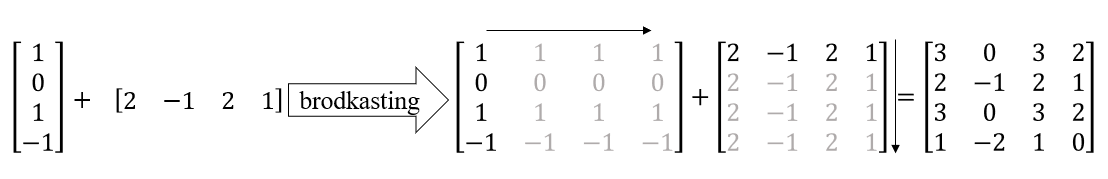  
</div>

Analogno ponašanje uočićemo i za član-po-član množenje, deljenje i stepenovanje vektora-vrsta i vektora-kolona.

<div>
   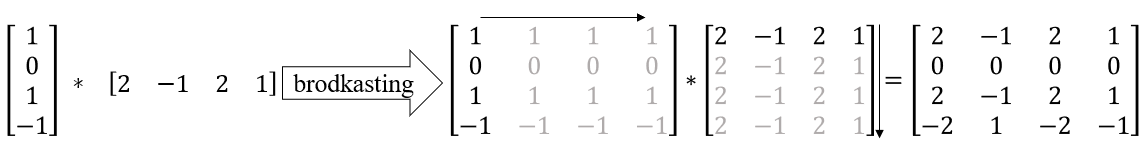  
</div>

In [69]:
u.reshape(4,1)*v.reshape(1,4) #zamena outer naredbi

array([[ 2, -1,  2,  1],
       [ 0,  0,  0,  0],
       [ 2, -1,  2,  1],
       [-2,  1, -2, -1]])

<div>
   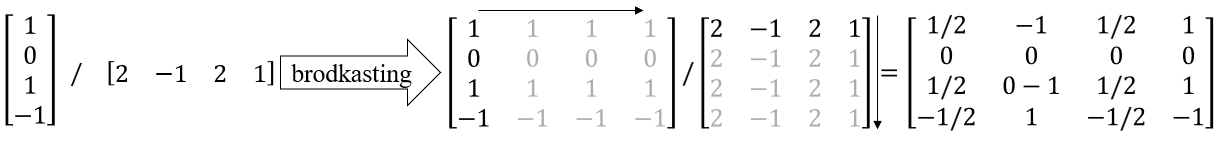  
</div>

In [70]:
u.reshape(4,1)/v.reshape(1,4)

array([[ 0.5, -1. ,  0.5,  1. ],
       [ 0. , -0. ,  0. ,  0. ],
       [ 0.5, -1. ,  0.5,  1. ],
       [-0.5,  1. , -0.5, -1. ]])

In [71]:
v**2  #kvadriranje svih elemenata niza

array([4, 1, 4, 1])

In [72]:
w=np.array([0,1,2,3,4])
v.reshape(4,1)**w

array([[ 1,  2,  4,  8, 16],
       [ 1, -1,  1, -1,  1],
       [ 1,  2,  4,  8, 16],
       [ 1,  1,  1,  1,  1]])

In [73]:
kolona**vrsta  #stepenovanje komponenti  na različite izložioce

ValueError: Integers to negative integer powers are not allowed.

In [74]:
vrsta**kolona

ValueError: Integers to negative integer powers are not allowed.

In [75]:
vrsta.astype(np.float64)**kolona

array([[-1. ,  0.5],
       [ 1. ,  1. ],
       [-1. ,  2. ]])

***

Navodimo tabelu sa nekim elementarnim matematičkim funkcijama. One su implementirane kao standardne član-po-član funkcije nad nizovima. Poseduju prednost u odnosu na sekvencijalno izračunavanje jer podrazumevaju paralelizaciju, tj. vektorizaciju izračunavanja.

|Функција|име у имплементацији|Функција|име у имплементацији|
|---|---|---|---|
|$x^s$|`x**s`|$\sin x$|`sin(x)`|
|$a^x$|`a**x`|$\arcsin x$|`arcsin(x)`|
|$\sqrt{x}$|`sqrt(x)`|$\cos x$|`cos(x)`|
|$\sqrt[3]{x}$|`cbrt(x)`|$\arccos x$|`arccos(x)`|
|$e^x$|`exp(x)`|$\tan x$|`tan(x)`|
|$2^x$|`exp2(x)`|$\arctan x$|`arctan(x)`|
|${\rm ln}\,x$|`log(x)`|$\sinh x$ |`sinh(x)` |
|$\log_2x$|`log2(x)`|$\cosh x$ |`cosh(x)`|
|$\log_{10}x$|`log10(x)`| | |

**Primer 10.** Izračunaćemo vrednosti funkcije $f(x)=\dfrac{x^2}{2+x}+3\sin x$ za niz ulaznih argumenata $x\in\{-1,0,1,3.5\}.$ U tome će nam pomoći član-po-član definisane operacije i funkcije nad NumPy nizovima.

In [76]:
xk=np.array([-1,0,1,3.5])
fk=(xk**2)/(2+xk)+3*np.sin(xk)
print(xk)
print(fk)

[-1.   0.   1.   3.5]
[-1.52441295  0.          2.85774629  1.17492304]


Pojedinačne rezultate vrednosti funkcije možemo da proverimo izračunavanjem.

In [77]:
x=3.5
(x**2)/(2+x)+3*np.sin(x)

1.1749230442038676

***

**Primer 11.** Opisane član-po-član operacije i funkcije koje smo koristili nad vektorima mogu se upotrebiti i nad matricama. Pokazaćemo to na primeru dve konkretne matrice kroz izračunavanja.

In [78]:
A=np.array([[1,2,3],[3,2,1],[1,0,1]])
B=np.array([[1,-1,2],[1,-2,1],[4,1,2]])
print("A*B=",A*B)     #član-po-član množenje elemenata
print("A/B=",A/B)     #član-po-član deljenje elemenata

A*B= [[ 1 -2  6]
 [ 3 -4  1]
 [ 4  0  2]]
A/B= [[ 1.   -2.    1.5 ]
 [ 3.   -1.    1.  ]
 [ 0.25  0.    0.5 ]]


In [79]:
print(1/B)   #matrica reciprocnih vrednosti*

[[ 1.   -1.    0.5 ]
 [ 1.   -0.5   1.  ]
 [ 0.25  1.    0.5 ]]


In [80]:
matrica=np.array([[1,2,3],[4,5,6]])
print(matrica)
matrica+2  #dodavanje istog broja svim elementima matrice

[[1 2 3]
 [4 5 6]]


array([[3, 4, 5],
       [6, 7, 8]])

***

**Primer 12.** Slično, nad matricama mogu da se sprovode vektor-po-vektor operacije. U svim ćelijama u nastavku levi ili desni operand može da bude NumPy niz. Lista je postavljena samo zbog kraćeg kucanja.

<div>
   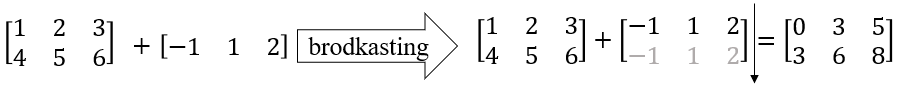  
</div>

In [81]:
matrica+np.array([-1,1,2])  #zbog poklapanja dimenzija vršiće se dodavanje 
#elemenata desne liste svakoj vrsti matrice

array([[0, 3, 5],
       [3, 6, 8]])

In [82]:
[-1,-1,2]+matrica  #zbog poklapanja dimenzija vršiće se dodavanje elemenata leve liste svakoj vrsti matrice

array([[0, 1, 5],
       [3, 4, 8]])

In [83]:
matrica+np.array([-1,-1,2])

array([[0, 1, 5],
       [3, 4, 8]])

<div>
   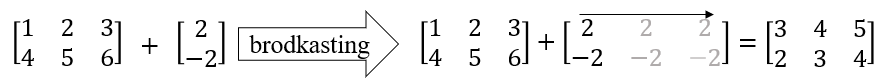  
</div>

In [84]:
matrica+[[2],[-2]] #zbog poklapanja dimenzija vršiće se dodavanje elemenata desne liste svakoj koloni matrice

array([[3, 4, 5],
       [2, 3, 4]])

In [85]:
matrica+np.array([[2],[-2]])

array([[3, 4, 5],
       [2, 3, 4]])

Analogne transformacije dešavaju se i prilikom upotrebe operacija `*` i `/`.

In [86]:
matrica*np.array([-1,-2,2.3]) #pokomponentno množenje liste i svake kolone matrice

array([[ -1. ,  -4. ,   6.9],
       [ -4. , -10. ,  13.8]])

In [87]:
D=np.diag([-1,-2,2.3])
matrica@D

array([[ -1. ,  -4. ,   6.9],
       [ -4. , -10. ,  13.8]])

In [88]:
matrica*np.array([1.3,2.5]).reshape(2,1)

array([[ 1.3,  2.6,  3.9],
       [10. , 12.5, 15. ]])

In [89]:
matrica*np.array([[2],[-2]])

array([[  2,   4,   6],
       [ -8, -10, -12]])

In [90]:
D=np.diag([2,-2])
D@matrica

array([[  2,   4,   6],
       [ -8, -10, -12]])

Vidimo da za rad sa dijagonalnim matricama nije neophodno rezervisati pun memorijski prostor. Dovoljno je poznavanje vektora dijagonalnih elemenata.

***

Obrađeni primeri u ovoj i prethodnoj radnoj svesci ukazuju da vektori-vrste dvodimenzionalnih nizova imaju određenu prednost u radu, dok se za rad sa vektorima-kolonama povremeno mora to posebno da naznači.

Još neki primeri pokomponentne primene osnovnih funkcija dati su u nastavku. Primena navedenih funkcija je nezavisna od toga da li je u primeru naveden jednodimenzionalni ili dvodimenzionalni niz kao argument. Svako od predstavljenih izračunavanja može da bude deo nekog složenijeg izraza. Bitno je samo da bude ispoštovano pravilo jednakih dimenzija tamo gde je to potrebno: sabiranje, vektor po vektor sabiranje, pokomponentno ili vektor po vektor množenje i deljenje, itd.

In [91]:
vektor=np.arange(6)
print(vektor)

[0 1 2 3 4 5]


In [92]:
vektor//2

array([0, 0, 1, 1, 2, 2], dtype=int32)

In [93]:
vektor%3

array([0, 1, 2, 0, 1, 2], dtype=int32)

In [94]:
2**vektor

array([ 1,  2,  4,  8, 16, 32], dtype=int32)

In [95]:
matrica**2

array([[ 1,  4,  9],
       [16, 25, 36]])

In [96]:
np.exp(vektor)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,
        54.59815003, 148.4131591 ])

In [97]:
matrica=np.array([[np.pi,0,np.pi/3],[-np.pi/4,-2*np.pi/3,np.pi]])
print(matrica)

[[ 3.14159265  0.          1.04719755]
 [-0.78539816 -2.0943951   3.14159265]]


In [98]:
np.sin(matrica)

array([[ 1.22464680e-16,  0.00000000e+00,  8.66025404e-01],
       [-7.07106781e-01, -8.66025404e-01,  1.22464680e-16]])

***

## Pristup elementima niza 

Izraz u uglastim zagradama `[ ]` označava operator indeksiranja. Indeksom se označava član uređene kolekcije objekata: niza (ili liste, ili stringa). Drugim rečima indeksiranje koje opisujemo u nastavku važi za sve tri navedene vrste podataka. Zbog toga operator indeksiranja `[ ]` predstavljamo isključivo na jednom tipu podataka, NumPy nizovima. 

Operator indeksiranja `[ ]` odabira pojedinačne elemente u nizu ili podnizove. Time je omogućen pristup pojedinačnim elementima i podnizovima bilo za njihovo čitanje, bilo za izmenu sadržaja. 

<div class="alert alert-block alert-info">
<b>Napomena:</b> U radu sa nizovima voditi računa o opsegu indeksa!
Prvi element liste ili niza je indeksa 0.</div>

**Primer 13.** Na narednoj slici data je šema indeksiranja NumPy niza $[1,-1,0,-2,2,3,4,-1,1,0].$  Elementi niza su unutar bele duge vrste sa crnim granicama.  Ispod i iznad su naznačene vrednosti pozicija, tj. vrednosti indeksa odgovarajućih elemenata:
- gornji prostor opisuje indeksiranje unapred, tj. brojanje od početnog (nultog) elementa,
- donji prostor opisuje indeksiranje unazad, tj. odbrojavanjem od poslednjeg elementa (-1).

Plava polja označavaju opsege vrednosti indeksa. 

<div>
   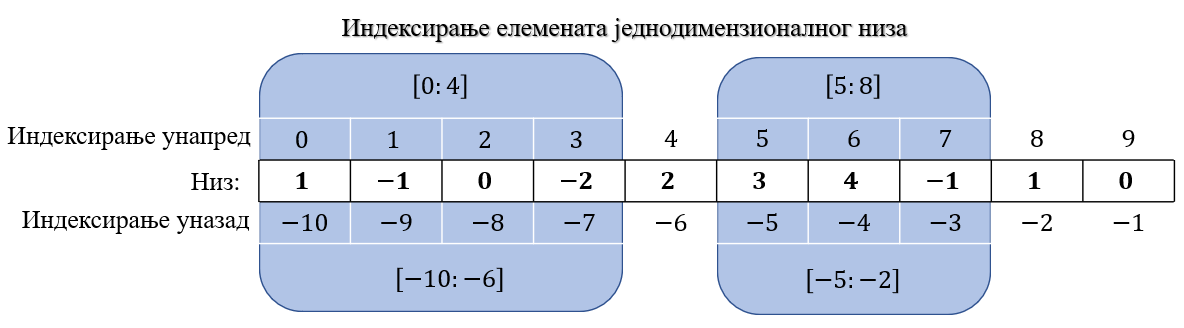  
</div>

Iz šeme vidimo da indeksiranje pojedinačnih delova niza počinje od broja 0 i sukcesivno se nastavlja, kada brojimo elemente na taj način. Bilo kojem pojedinačnom elementu ovog niza (za čitanje ili promenu vrednosti) pristupamo navođenjem imena niza i indeksa elementa unutar uglastih zagrada `[ ]`.

In [99]:
niz=np.array([1,-1,0,-2,2,3,4,-1,1,0])
print(niz[0]," , ",niz[6])
niz[6]=niz[6]//2
niz

1  ,  4


array([ 1, -1,  0, -2,  2,  3,  2, -1,  1,  0])

Vratićemo elemente niza na početne vrednosti kako bi izlazi narednih ćelija odgovarali prikazu na slici.

In [100]:
niz=np.array([1,-1,0,-2,2,3,4,-1,1,0])

Osim pojedinačnog pristupa moguće je indeksiranje i grupe elemenata niza. U tom slučaju se odgovarajući indeksi navode kao lista (ili niz) unutar operatora indeksiranja `[ ]`. Redosled navođenja indeksa ne mora da poodleže nikakvom pravilu, ali indeksi moraju da budu iz opsega veličine niza. Za konkretno niz iz ovog primera maksimalna vrednost indeksa je 9.

In [101]:
prom1, prom2=3 , -3

In [102]:
prom1, prom2

(3, -3)

In [103]:
niz[[0,1,2,3,8]]=3

In [104]:
niz

array([ 3,  3,  3,  3,  2,  3,  4, -1,  3,  0])

In [105]:
2*[1,3]+3*[6,4,9]

[1, 3, 1, 3, 6, 4, 9, 6, 4, 9, 6, 4, 9]

In [106]:
niz[2*[1,3]+3*[6,4,9]]

array([3, 3, 3, 3, 4, 2, 0, 4, 2, 0, 4, 2, 0])

In [107]:
niz[np.array([0,2,8,1])]

array([3, 3, 3, 3])

Isto dejstvo ima i naredba `take`.

In [108]:
np.take(niz,2*[1,3]+3*[6,4,9])

array([3, 3, 3, 3, 4, 2, 0, 4, 2, 0, 4, 2, 0])

Indeksi za izdvajanje elemenata iz niza ne moraju da budu zadati samo listama. Indeksiranje može da se vrši i elementima niza. Neophodno je da oni budu celi brojevi u opsegu vrednosti indeksa za dati niz.

In [109]:
niz[np.array([0,2,8,1])]

array([3, 3, 3, 3])

In [110]:
np.take(niz,np.array([0,2,8,1]))

array([3, 3, 3, 3])

In [111]:
niz[10]

IndexError: index 10 is out of bounds for axis 0 with size 10

In [112]:
niz[10%niz.size]

3

Kada grupa indeksa podleže nekim pravilnostima možemo da koristimo olakšice. U te svrhe koristi se kombinacija operatora indeksiranja i operatora listanja `:`. Ovaj operator ima slične karakteristike `arange` naredbe.  

Format $[n:m]$ vraća deo niza počevši od elementa sa indeksom $n$ pa do elementa sa indeksom $m-1.$ Misli se na Python način indeksiranja koji počinje brojanje od 0 ili negativno indeksiranje. 

Ukoliko se ne navede početni indeks $n$ podrazumevana vrednost je $0.$ Ukoliko se ne navede drugi indeks $m,$ podrazumeva se da mu je vrednost kraj niza. U takvoj situaciji je i poslednji element uključen.

Indeksiranje u formatu $[n:m:k]$ daje svaki $k-$ti element počevši od onog sa indeksom $n.$

<div class="alert alert-block alert-info">
<b>Napomena:</b> Voditi računa da se poslednji indeks $m$ u opsegu $[n:m]$ ili $[n:m:k]$ ne koristi. To važi za indeksiranje unapred i indeksirnje unazad. Uključivanje poslednjeg elementa niza moguće je u formatu $[n:]$ ili $[n::k]$ </div>

In [113]:
print(niz)

[ 3  3  3  3  2  3  4 -1  3  0]


In [114]:
niz[0:4]   #elementi od početka do onog sa indeksom 3

array([3, 3, 3, 3])

In [115]:
niz[:4]    #elementi od početka do onog sa indeksom 3

array([3, 3, 3, 3])

In [116]:
niz[5:8]  #elementi počevši od indeksa 5 do indeksa 7

array([ 3,  4, -1])

In [117]:
niz[5:]   #elementi počevši od indeksa 5 do kraja niza

array([ 3,  4, -1,  3,  0])

In [118]:
niz[5:9]   , niz[5:10] 

(array([ 3,  4, -1,  3]), array([ 3,  4, -1,  3,  0]))

In [119]:
niz[::2] #elementi od početka do kraja, svaki drugi

array([3, 3, 2, 4, 3])

In [120]:
niz[::-1] #elementi od početka do kraja, u obrnutom redosledu

array([ 0,  3, -1,  4,  3,  2,  3,  3,  3,  3])

Specijalno, svi elementi jednodimenzionalnog niza dobijaju se ne navođenjem nijedne granice u operatoru listanja. Ovo svojstvo je bitno za nizove više dimenzija.

In [121]:
niz[:]

array([ 3,  3,  3,  3,  2,  3,  4, -1,  3,  0])

Elementi objekata ovog tipa mogu takođe i da se indeksiraju sa kraja. Negativne vrednosti indeksa broje elemente zdesna nalevo. Način korišćenja pojedinačnog pristupa ili operatora listanja `:` odgovara prethodno opisanom. Njegovo dejstvo prikazaćemo na narednom primeru.

In [122]:
vektor=np.arange(-5,6)
print(vektor)
print(vektor[0])
print(vektor[6])
print(vektor[-1])
print(vektor[-4])

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
-5
1
5
2


In [123]:
print(vektor)
print(vektor[:-4])
print(vektor[-6:])
print(vektor[-6::2])

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
[-5 -4 -3 -2 -1  0  1]
[0 1 2 3 4 5]
[0 2 4]


***

Specijalizovane funkcije za rad sa NumPy nizovima koje su upotrebljene u primerima u nastavku navedene su u tabeli.

|Funkcija|Dejstvo|
|:---|:---|
|`sort`|Sortira niz u neopadajući|
|`argsort`|Vraća niz indeksa koji daju sortiran niz|
|`max`|Vraća maksimalnu vrednost niza|
|`argmax`|Vraća indeks prvog pojavljivanja maksimalnog elementa niza|
|`min`|Vraća minimalnu vrednost niza|
|`argmin`|Vraća indeks prvog pojavljivanja minimalnog elementa niza|

**Primer 14.** Naredbom `sort` dobijamo niz uređen rastuće. Ukoliko želimo obrnut redosled indeksiranjem preokrećemo.

In [124]:
print(v)
sv=np.sort(v)
print(sv)
sv[::-1]

[ 2 -1  2  1]
[-1  1  2  2]


array([ 2,  2,  1, -1])

Na ovaj način izvršena je fizička promena mesta elementima niza radi njegovog sortiranja. Rastući niz može da se dobije i na osnovu činjenice: 
> ako je funkcija $f$ rastuća onda je funkcija $-f$ opadajuća, i obrat.

In [125]:
print(v)
sv=np.sort(-v)
print(-sv)

[ 2 -1  2  1]
[ 2  2  1 -1]


Naredba `argsort` vraća redosled indeksa kojim bi polazni niz bio sortiran u rastući.

In [126]:
indeksi=np.argsort(v)
v[indeksi]

array([-1,  1,  2,  2])

Za opadajući redosled elemenata možemo da iskoristimo kod:

In [127]:
indeksi=np.argsort(-v)
v[indeksi]

array([ 2,  2,  1, -1])

In [128]:
vektor=np.array([-2,1,3,-1,7,-8,9,1,-2])
np.max(vektor)

9

In [129]:
sv[-3:]

array([-2, -1,  1])

In [130]:
indeksi=np.argsort(vektor)

Maksimalnu vrednost unutar niza ili prvu poziciju pojavljivanja takvog elementa takođe jednostavno dobijamo ugrađenim funkcijama NumPy biblioteke. 

In [131]:
np.max(vektor)

9

In [132]:
np.argmax(vektor)

6

In [133]:
vektor[6] , vektor

(9, array([-2,  1,  3, -1,  7, -8,  9,  1, -2]))

Ako je potrebno ispisati prvih nekoliko maksimalnih elemenata možemo da iskoristimo sličan ovom u nastavku.

In [134]:
ind3=indeksi[-3:]

In [135]:
vektor[ind3]

array([3, 7, 9])

Na sličan način funkcionišu i naredbe `min` i `argmin`.

Istovremeno indeksiranje više elemenata možemo da koristimo i za izmenu njihovog sadržaja, ne samo prikaz.

In [136]:
print(vektor)
vektor[3]=5
print(vektor)

[-2  1  3 -1  7 -8  9  1 -2]
[-2  1  3  5  7 -8  9  1 -2]


Prilikom dodele više različitih vrednosti bitno je voditi računa da se slaže broj elemanata na levoj i desnoj strani operatora dodele.

In [137]:
print(vektor)
vektor[2:-3]=[2,3,4,1,2,3]
print(vektor)

[-2  1  3  5  7 -8  9  1 -2]


ValueError: could not broadcast input array from shape (6,) into shape (4,)

In [138]:
vektor[0:6]=2*[2,1,2]
print(vektor)

[ 2  1  2  2  1  2  9  1 -2]


***

**Primer 15.** Strategija "podeli pa vladaj" jedna je od najmoćnijih algoritamskih paradigmi za dizajn efikasnih algoritama. Ideja je zasnovana na podeli problema visoke dimenzionalnosti na više problema istog tipa ali niže dimenzionalnosti. Svaki od ovih potproblema može ponovo da se razdvoji u potprobleme, itd. Postupak usitnjavanja sprovodi se do nivoa kada su dobijeni potproblemi dovoljno mali. Rešenje polaznog problema tada se dobija kombinovanjem rešenja potproblema vraćajući se unazad kroz hijerarhiju. Ovu ideju ilustrovaćemo na primeru sume $n+1=2^k$ brojeva, $S=\displaystyle\sum_{k=0}^na_k.$ Uobičajen način za izračunavanje sume je akumulacija kroz rekurziju.
$$S_0=a_0,\qquad S_k=S_{k-1}+a_k,\ k=1,\dots,n.$$

In [139]:
from timeit import default_timer as timer
import numpy.random as rndm

In [140]:
k=12
n=2**k
a=rndm.rand(n)  #generisanje 2^k slucajnih brojeva iz opsega [0,1)

In [141]:
start = timer()
s=a[0]
for i in range(1,n):
    s=s+a[i]
end = timer()
print("Vreme izvrsenja algoritma: ",end - start,"sec")
print("Suma je: ",s)

Vreme izvrsenja algoritma:  0.0014368999982252717 sec
Suma je:  2055.4250965491105


Drugi način je sumiranje koje dozvoljava paralelizaciju procesa tako da se čitav postupak odvija u $k$ iteracija. Šema takvog sumiranja data je na primeru $k=3.$
<div>
   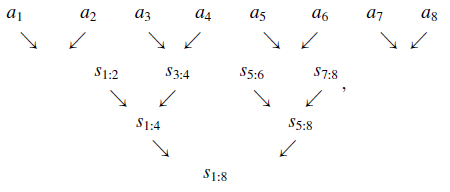  
</div>

In [142]:
start = timer()
s=a.copy()
for i in range(k):
    s=s[0::2]+s[1::2]
end = timer()
print("Vreme izvrsenja algoritma: ",end - start,"sec")
print("Suma je: ",s)

Vreme izvrsenja algoritma:  0.00020200001017656177 sec
Suma je:  [2055.42509655]


Uočavamo razliku u vremenima izvršenja dva postupka izračunavanja. 

Proverićemo i vreme izvršenja ugrađene naredbe NumPy biblioteke.

In [143]:
start = timer()
s=np.sum(a)
end = timer()
print("Vreme izvrsenja algoritma: ",end - start,"sec")
print("Suma je: ",s)

Vreme izvrsenja algoritma:  0.00015589999384246767 sec
Suma je:  2055.425096549109


Ukoliko je potrebno izdvajanje elemenata koji nisu uzastopni, to postižemo navođenjem liste indeksa pod operatorom indeksiranja. Ovakav način indeksiranja je pogodan za zamenu mesta vrednosti elemenata u listi jer ne zahteva upotrebu pomoćnih promenljivih.

Podsetimo se da Python dozvoljava istovremenu dodelu vrednosti više promenljivih.
Istovremena dodela vrednosti olakšava postupak zamene sadržaja dve ili više promenljivih,
jednog ili više delova NumPy niza.

In [144]:
vektor=np.arange(11)
print(vektor)
vektor[[2,4]]=vektor[[4,2]]  #istovremena zamena mesta dve vrednosti
print(vektor)
vektor[[0,1,3,5]]=vektor[[5,3,1,0]] #istovremena zamena mesta više vrednosti
print(vektor)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  4  3  2  5  6  7  8  9 10]
[ 5  3  4  1  2  0  6  7  8  9 10]


***

Referenciranje elemenata u višedimenzionalnim nizovima izvodi se na sličan način prikazanom za jednodimenzionalne nizove. Dvodimenzionalni nizovi su niz jednodimenzionalnih nizova pa za njihove pojedinačne elemente koristimo parove indeksa. Osim toga, cele vrste mogu da budu direktno referncirane kao elementi glavnog niza. 

**Primer 16.** Data je matrica dimenzije $3\times5$ svojim elementima. Šeme indeksiranja vrsta i pojedinačnih elemenata date su na narednoj slici.
<div>
   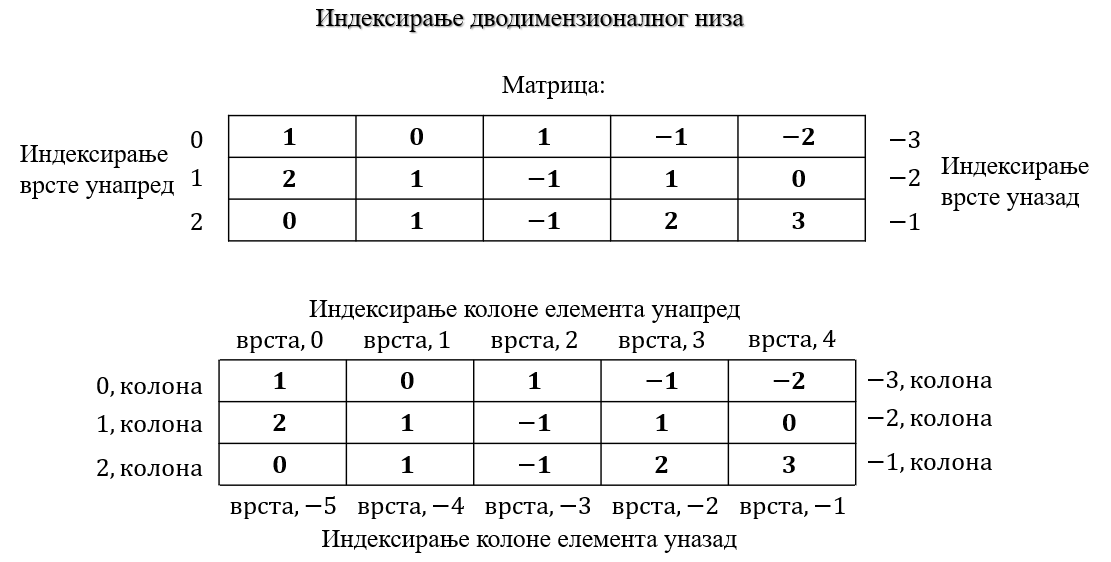  
</div>

Naredne kodne ćelije pomoći će da upoznamo indeksiranje matrica na primeru matrice dimenzije $3\times5$.

In [145]:
matrica=np.array([[1,0,1,-1,-2],[2,1,-1,1,0],[0,1,-1,2,3]])
print(matrica)
print(matrica[0])           #prva vrsta matrice
print(matrica[-1])          #poslednja vrsta matrice

[[ 1  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]]
[ 1  0  1 -1 -2]
[ 0  1 -1  2  3]


In [146]:
matrica[:2]        #prve dve vrste matrice

array([[ 1,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0]])

In [147]:
matrica[::2]      #vrste matrice sa korakom 2

array([[ 1,  0,  1, -1, -2],
       [ 0,  1, -1,  2,  3]])

In [148]:
B=matrica[[0,1,-1,0,2,0]]      #vrste matrice navedenih indeksa
B

array([[ 1,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0],
       [ 0,  1, -1,  2,  3],
       [ 1,  0,  1, -1, -2],
       [ 0,  1, -1,  2,  3],
       [ 1,  0,  1, -1, -2]])

In [149]:
B[0,0]=0
B

array([[ 0,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0],
       [ 0,  1, -1,  2,  3],
       [ 1,  0,  1, -1, -2],
       [ 0,  1, -1,  2,  3],
       [ 1,  0,  1, -1, -2]])

In [150]:
matrica

array([[ 1,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0],
       [ 0,  1, -1,  2,  3]])

Zaključujemo da je $B$ nezavisna kopija delova niza $matrica.$ Prema tome, dodela tipa `niz1=f(niz2)`, gde je `f` neka transformacija (obrada) višeg nivoa,  pravi nezavisne verzije nizova. 

In [151]:
C=matrica[[2,0,1]]
C

array([[ 0,  1, -1,  2,  3],
       [ 1,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0]])

In [152]:
C[0,0]=6
print(C)
matrica

[[ 6  1 -1  2  3]
 [ 1  0  1 -1 -2]
 [ 2  1 -1  1  0]]


array([[ 1,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0],
       [ 0,  1, -1,  2,  3]])

In [153]:
C=matrica[::2]
C

array([[ 1,  0,  1, -1, -2],
       [ 0,  1, -1,  2,  3]])

In [154]:
C[0,0]=6
print(C)
matrica

[[ 6  0  1 -1 -2]
 [ 0  1 -1  2  3]]


array([[ 6,  0,  1, -1, -2],
       [ 2,  1, -1,  1,  0],
       [ 0,  1, -1,  2,  3]])

Ova matrica $C$ nije nezavisna kopija matrice $matrica.$

Osim toga, vidimo da za indeksiranje pojedinačnih elemenata dvodimenzionanog niza koristimo parove indeksa razdvojene zarezom.

In [155]:
print(matrica)
matrica[1,2]         #element matrice na poziciji (2,3)

[[ 6  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]]


-1

In [156]:
print(B)
B[-2,-2]

[[ 0  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]
 [ 1  0  1 -1 -2]
 [ 0  1 -1  2  3]
 [ 1  0  1 -1 -2]]


2

Za izdvajanje podmatrica elemenata (elementi u preseku istaknutih vrsta i kolona) kombinuju se prethodno prikazani načini. 

In [157]:
print(matrica)
matrica[:,2]        #treća kolona matrice

[[ 6  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]]


array([ 1, -1, -1])

In [158]:
matrica[::2,1::2]   #izdvajanje podmatrice sa indeksima vrsta i kolona [(1,3),(2,4)]

array([[ 0, -1],
       [ 1,  2]])

Kada indeksi vrsta i kolona ne podležu zakonitostima operatora listanja `:`, izdvajanje elmenata u preseku navedenih indeksa vrsta i indeksa kolona odvija se iz dve etape: najpre izdvajanje vrsta, a zatim u njima izdvajanje kolona (ili obrat).

In [159]:
print(matrica)
vrste=np.array([0,1])
kolone=np.array([0,1,4])
print(matrica[vrste])
print(matrica[:,kolone])

[[ 6  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]]
[[ 6  0  1 -1 -2]
 [ 2  1 -1  1  0]]
[[ 6  0 -2]
 [ 2  1  0]
 [ 0  1  3]]


In [160]:
matrica[vrste][:,kolone]

array([[ 6,  0, -2],
       [ 2,  1,  0]])

In [161]:
matrica[:,kolone][vrste]

array([[ 6,  0, -2],
       [ 2,  1,  0]])

Kao i kod jednodimenzionalnih nizova indeksiranje matrica može da se koristi za čitanje i izmenu njenog sadržaja. I ovde je veoma korisna istovremena zamena mesta sadržaja više pozicija unutar matrice.

In [162]:
print(matrica)
matrica[:,[0,4]]=matrica[:,[1,2]]   #izmena sadržaja prve i pete kolone upisivanjem druge i treće kolone u njih
matrica

[[ 6  0  1 -1 -2]
 [ 2  1 -1  1  0]
 [ 0  1 -1  2  3]]


array([[ 0,  0,  1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1, -1,  2, -1]])

**Zadatak 1.** Napisati kod za:

a) Generisanje promenljive **a** koja je niz brojeva od 0,1,2,...,15. Brojeve ne unositi ručno već koristiti neku od naredbi NumPy modula za automatsko generisanje nizova.

b) Generisanje promenljive **b**, na osnovu postojećeg niza **a**, upotrebom operacija nad nizovima (+,-,\*,/ i slično). Elementi niza **b** glase -3, -1,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27. Uočiti pravilnost (linearna je) i iskoristiti je za kreiranje niza **b**.

c) Generisanje vektora **cb** centriranih vrednosti niza **b**.

d) Indeksiranjem promeniti sadržaj vektora **a** prema sledećem pravilu:
$$[0\ 1\ 2\ 3\ 4\ 5\ 6\ 7\ 8\ 9\ 10\ 11\ 12\ 13\ 14\ 15]\ \mapsto\ [0\ 1\ 2\ 3\ 4\ 5\ -1\ 2\ -1\ 2\ 10\ 11\ 0\ 0\ 0\ 0]$$

In [163]:
a=np.arange(16)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [164]:
b=2*a-3
b

array([-3, -1,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27])

In [165]:
mu=b.mean()
cb=b-mu
cb

array([-15., -13., -11.,  -9.,  -7.,  -5.,  -3.,  -1.,   1.,   3.,   5.,
         7.,   9.,  11.,  13.,  15.])

In [166]:
a[6:10]=2*[-1,2]
a

array([ 0,  1,  2,  3,  4,  5, -1,  2, -1,  2, 10, 11, 12, 13, 14, 15])

In [167]:
a[-4:]=4*[0]
a

array([ 0,  1,  2,  3,  4,  5, -1,  2, -1,  2, 10, 11,  0,  0,  0,  0])

**Zadatak 2.** Употребом индексирања креирати матрицу $A$ димензије $8\times8$ са јединицама на ивицама и нулама свуда другде, тј.
$$A=\begin{bmatrix}1&1&1&\dots&1&1&1\\1&0&0&\dots&0&0&1\\1&0&0&\dots&0&0&1\\\vdots&\vdots&\vdots& &\vdots&\vdots&\vdots\\
1&0&0&\dots&0&0&1\\1&0&0&\dots&0&0&1\\1&1&1&\dots&1&1&1
\end{bmatrix}.$$

In [168]:
A=np.ones((8,8))
A[1:-1,1:-1]=0
A

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

**Zadatak 3.** Индексирањем креирати матрицу $B$ димензије $8\times8$ са цик-цак распоредом нула и јединица, тј.
$$B=\begin{bmatrix}1&0&1&\dots&0&1&0\\0&1&0&\dots&1&0&1\\1&0&1&\dots&0&1&0\\\vdots&\vdots&\vdots& &\vdots&\vdots&\vdots\\
0&1&0&\dots&1&0&1\\1&0&1&\dots&0&1&0\\0&1&0&\dots&1&0&1
\end{bmatrix}.$$

In [169]:
B=np.ones((8,8))
B[::2,::2]=0
B[1::2,1::2]=0
B

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

**Zadatak 4.** Neka je $\varepsilon_n=e^{i\frac{2\pi}{n}},$ gde je $n=2^m,\ m\in\mathbb{N}.$ Za dati vektor vrednosti $$v=\begin{bmatrix}1&\varepsilon_n&\varepsilon_n^2&\dots&\varepsilon_n^{n/2-1}\end{bmatrix},$$ koristeći operator indeksiranja izdvojiti elemente ovog vektora prema pravilu:
$$u=\begin{bmatrix}1&\varepsilon_r&\varepsilon_r^{2}&\dots&\varepsilon_r^{r/2-1}\end{bmatrix},\quad r=2^q,\ q=\overline{1,m}.$$

**Rešenje :**

Napravićemo vektore $v$ i $u$ za neke konkretne, male vrednosti parametara $m$ i $q.$ Menjanjem $q=\overline{1,m}$ kroz grafički prikaz možemo da potvrdimo detaljnu analizu datu u nastavku.

In [170]:
m=6
n=2**m
fi=2*np.pi/n
epsl=np.exp(fi*1j)
v=epsl**np.arange(n/2)
v.shape

(32,)

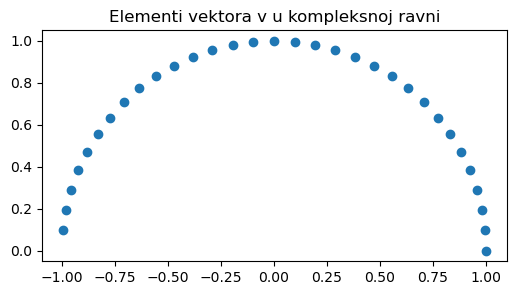

In [171]:
plt.figure(figsize= (6,3))
plt.plot(np.real(v),np.imag(v),'o')
plt.title("Elementi vektora v u kompleksnoj ravni");

Zamenom vrednosti $q$ u nastavku možemo da pratimo ponašanje elemenata podniza $u.$

In [172]:
q=3
r=2**q
psi=2*np.pi/r
epsr=np.exp(psi*1j)
u=epsr**np.arange(r/2)
u.shape

(4,)

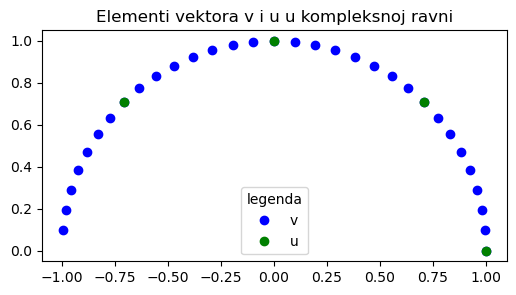

In [173]:
plt.figure(figsize= (6,3))
plt.plot(np.real(v),np.imag(v),'ob',label='v')
plt.plot(np.real(u),np.imag(u),'og',label='u')
plt.title("Elementi vektora v i u u kompleksnoj ravni")
plt.legend(loc='lower center', title='legenda');

Primetimo da je
$$\varepsilon_r=e^{i\frac{2\pi}{r}}=e^{i\frac{2\pi}{2^q}}=e^{i\frac{2\pi}{2^{q-m+m}}}=e^{i\frac{2\pi}{2^m}2^{m-q}}
=\left(e^{i\frac{2\pi}{2^m}}\right)^{2^{m-q}}=\varepsilon_m^{2^{m-q}}.$$
Zbog toga, izdvajanje elemenata $\begin{bmatrix}1&\varepsilon_r&\varepsilon_r^{2}&\dots&\varepsilon_r^{r/2-1}\end{bmatrix},\quad r=2^q,\ q=\overline{1,m}$ znači izdvajanje elemenata vektora $v$ sa indeksima $\begin{bmatrix}0&2^{m-q}&2\cdot2^{m-q}&\dots&(r/2-1)2^{m-q}\end{bmatrix},\quad r=2^q,\ q=\overline{1,m}.$ Narednim kodom se to postiže.

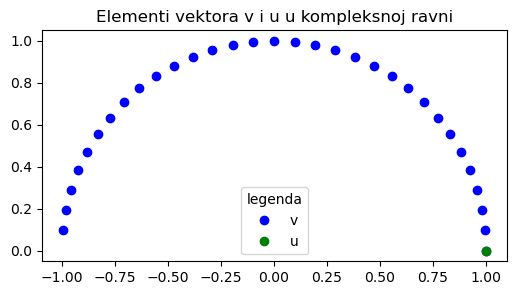

In [174]:
m=6
q=1
n=2**m
fi=2*np.pi/n
epsl=np.exp(fi*1j)
v=epsl**np.arange(n/2)

indeksi=np.arange(2**(q-1))*(2**(m-q))
uindks=v[indeksi]
plt.figure(figsize= (6,3))
plt.plot(np.real(v),np.imag(v),'ob',label='v')
plt.plot(np.real(uindks),np.imag(uindks),'og',label='u')
plt.title("Elementi vektora v i u u kompleksnoj ravni")
plt.legend(loc='lower center', title='legenda');

***